In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

import acquire as ac
import prepare as pr


# Part I
Do these exercises in explore.ipynb notebook. As always, add, commit, and push your changes. <br>
***Section 1*** - iris_db: Using iris data from our MySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.

In [2]:
iris = ac.get_iris_data()
iris.head(2)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2


In [3]:
iris_2 = ac.get_iris_data()
iris.head(2)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2


#### Prepare Notes: 
- drop columns that are not relevant: species_id
- rename species_id to species

In [4]:
# use the function to clean up the data
iris_2 = pr.clean_iris(iris_2)

In [5]:
# drop the column name: 
iris = iris.drop(columns='species_id')

In [6]:
# rename the species_name to species
iris = iris.rename(columns={'species_name':'species'})

In [7]:
# create a dummy:
dummy_df = pd.get_dummies(iris[['species']], drop_first = True)
dummy_df.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [8]:
# concat or add dummies to iris data
iris = pd.concat([iris, dummy_df], axis = 1)

In [9]:
iris_2.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0


In [10]:
iris.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0


#### split data

In [11]:
# using prep iris function:
train, validate, test = pr.prep_iris(ac.get_iris_data())
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
79,versicolor,5.7,2.6,3.5,1.0,1,0
121,virginica,5.6,2.8,4.9,2.0,0,1
3,setosa,4.6,3.1,1.5,0.2,0,0
68,versicolor,6.2,2.2,4.5,1.5,1,0
10,setosa,5.4,3.7,1.5,0.2,0,0


In [12]:
# using split_data function:

In [13]:
train, validate, test = pr.split_data(iris, 'iris')
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
138,virginica,6.0,3.0,4.8,1.8,0,1
7,setosa,5.0,3.4,1.5,0.2,0,0
79,versicolor,5.7,2.6,3.5,1.0,1,0
74,versicolor,6.4,2.9,4.3,1.3,1,0
97,versicolor,6.2,2.9,4.3,1.3,1,0


### 2. Univariate Stats
- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [14]:
# partition out x(independent vars, features)
# partition out y (dependent var, target)
x_train = train.drop(columns='species')
y_train = train[['species']]

#for utility:  set a variable for a target variable
target = 'species'

In [15]:
# split up the x variables into categorical and numerical:
cat_cols, num_cols = [], []
# for a column in the x_train data frame:
for col in x_train.columns:
    # if the column is an object:
    if x_train[col].dtype == 'O':
        # add the column to the category list
        cat_cols.append(col)
    # else not an object:   
    else:
        # if the column has unique values under 10:
        if x_train[col].nunique() < 10:
            # add the columns to category list
            cat_cols.append(col)
        # else not object and unique is not under 10:
        else:
            # and the column to the numbers list
            num_cols.append(col)

In [16]:
# a way to have each function separate for understanding:
cat_cols = []

for col in x_train.columns:
    if x_train[col].dtype == 'O' or x_train[col].nunique() < 10:
        cat_cols.append(col)

In [17]:
# a way to have each function separate for understanding:
num_cols = []

for col in x_train.columns:
    if x_train[col].dtype != 'O' and x_train[col].nunique() >= 10:
        num_cols.append(col)

In [18]:
cat_cols

['species_versicolor', 'species_virginica']

In [19]:
num_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

##### a. graphs quantitative:

Distribution of sepal_length


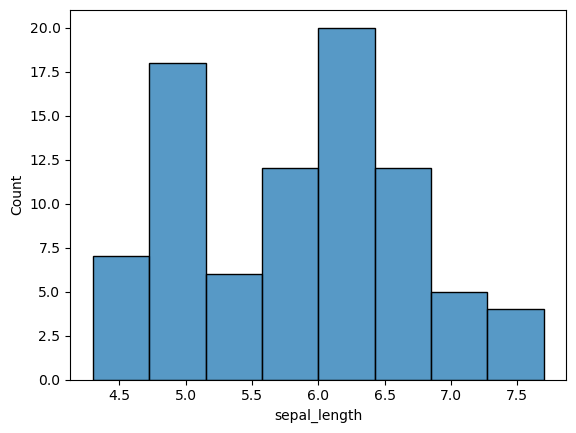

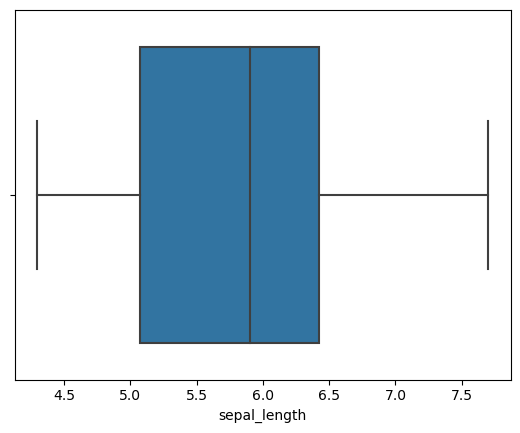

Distribution of sepal_width


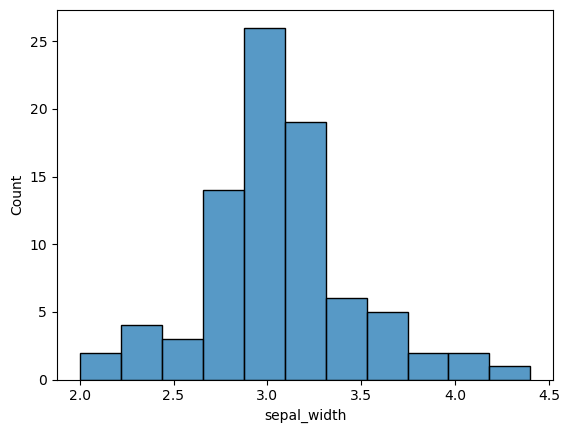

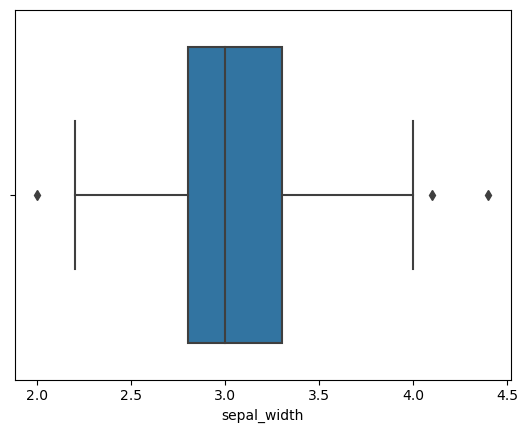

Distribution of petal_length


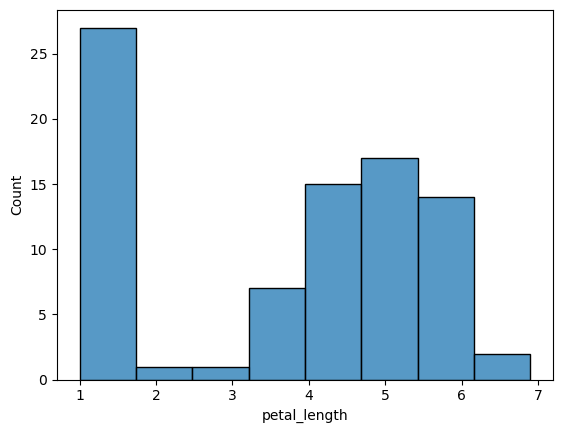

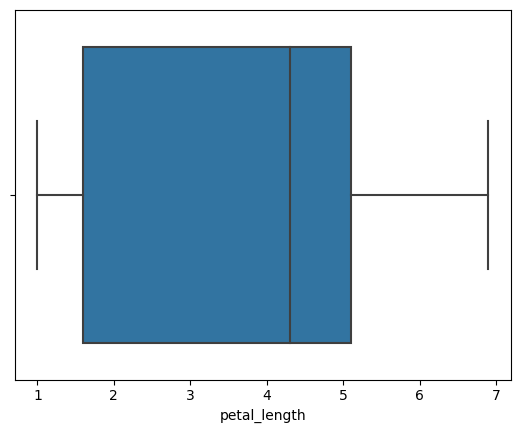

Distribution of petal_width


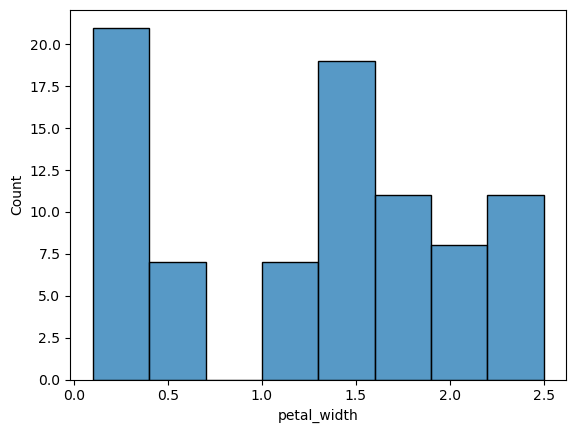

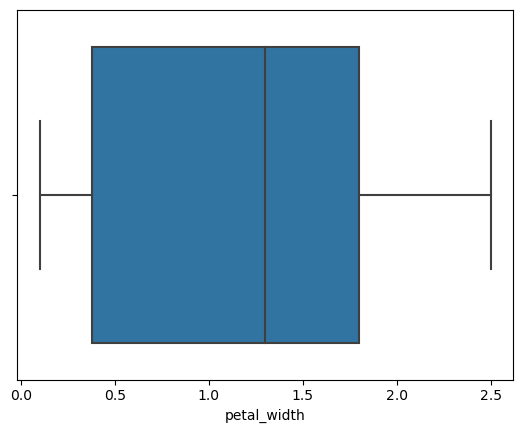

In [20]:
# making a for loop makes things go by much faster:
# Quantitative first:
for col in num_cols:
    # print out the title:
    print (f'Distribution of {col}')
    # first graph is a histogram: 
    sns.histplot(data=train, x = col)
    plt.show()
    # second graph is boxplot
    #plt.boxplot(train[col])
    #plt.show()
    sns.boxplot(data=train, x = col)
    plt.show()
    print('=======================')

##### b. graph categorical:

In [21]:
# frequcny table: 
frequency = train['species'].value_counts()
frequency

virginica     28
setosa        28
versicolor    28
Name: species, dtype: int64

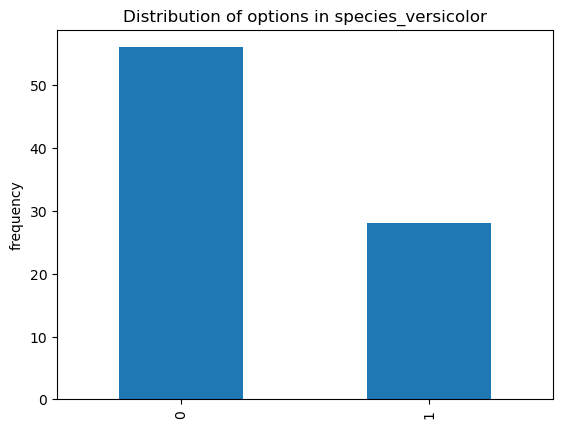

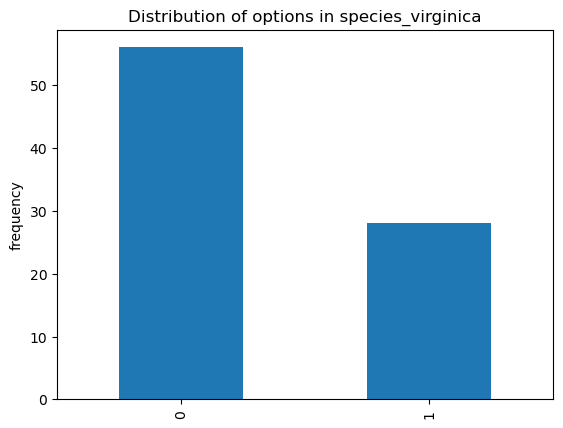

In [22]:
# note to self 1 = species is present. 0 = not this species
for col in cat_cols:
    train[col].value_counts().plot(
        kind='bar').set(
        title=f'Distribution of options in {col}')
    plt.ylabel("frequency")
    plt.show()

##### Takeaway:
- There is an even amount of virginica, versicolor, and setosa.
- the majority of sepal length is around 6.0
- the majority of sepal width is under 3.5. It has some outliers
- petal length is everywhere, mean around 4.5
- petal width is mostly is around 1.5

### 3. Bivariate Stats
- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

In [24]:
# need to get the mean lenghts of the measurments:
mean_sepal_length = train.sepal_length.mean()
mean_sepal_width = train.sepal_width.mean()
mean_petal_length = train.petal_length.mean()
mean_petal_width = train.petal_width.mean()

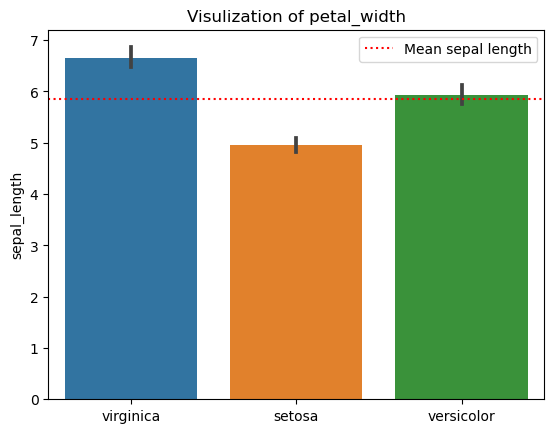

In [41]:
# need to create barplot's with a horizontal line: 
# sepal_length:
plt.title(f'Visulization of {col}')
# calling seaborn for a bar plot, specifying species and sepal length
sns.barplot(x="species", y="sepal_length", data=train)
# annotate a mean of the sepal length
# place the calculated mean as a horizontal axis line
plt.axhline(mean_sepal_length, label="Mean sepal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()
    

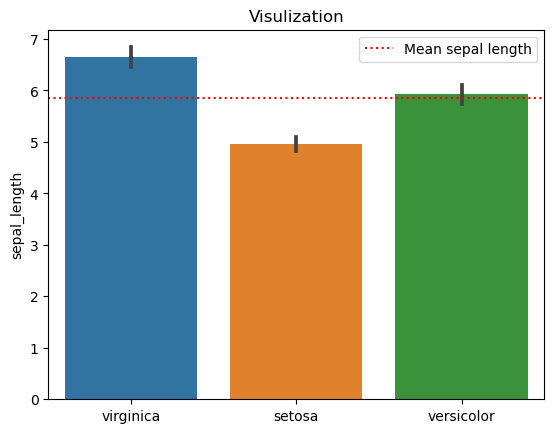

count    84.000000
mean      5.847619
std       0.841324
min       4.300000
25%       5.075000
50%       5.900000
75%       6.425000
max       7.700000
Name: sepal_length, dtype: float64


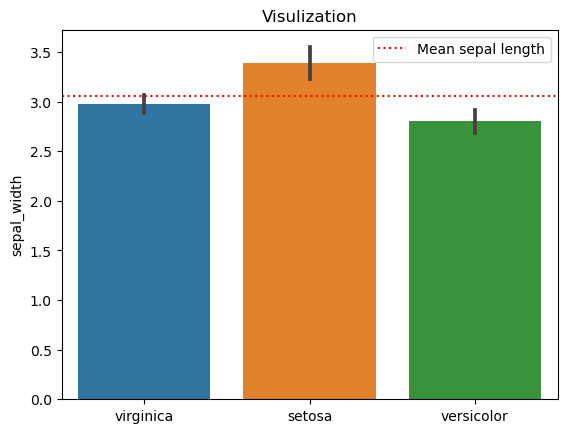

count    84.000000
mean      3.053571
std       0.417233
min       2.000000
25%       2.800000
50%       3.000000
75%       3.300000
max       4.400000
Name: sepal_width, dtype: float64


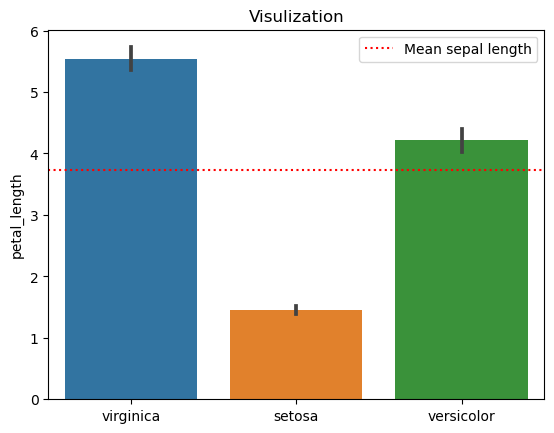

count    84.000000
mean      3.738095
std       1.765459
min       1.000000
25%       1.600000
50%       4.300000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


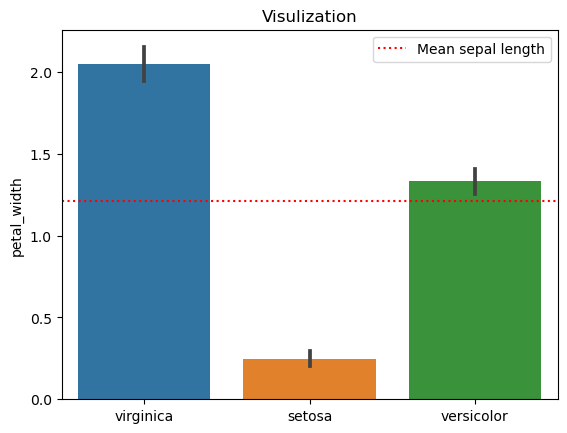

count    84.000000
mean      1.208333
std       0.775717
min       0.100000
25%       0.375000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [34]:
for col in num_cols:
    plt.title('Visulization')
    sns.barplot(x=target, y= col, data=train)
    col_mean = train[col].mean()
    plt.axhline(col_mean, label="Mean sepal length", color='red', linestyle='dotted')
    plt.xlabel('')
    plt.legend()
    plt.show()
    print(train[col].describe())

##### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

$H_0$: There is no difference between versicolor and viriginica petal length.
<br>
$H_a$: There is a difference between versicolor and viriginica petal length.

In [51]:
# Mann_Whitney: 
versicolor = train[train.species =='versicolor']
virginica = train[train.species=='virginica']

stat, p_val = stats.mannwhitneyu(versicolor['petal_length'], virginica['petal_length'])
if p_val < 0.05:
    print('We can reject the null hypothesis; the means are different.')
else:
    print('We cannot reject the null hypothesis')

We can reject the null hypothesis; the means are different.


### 4. Multivariate Stats
- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions

Comparision of sepal_length with species


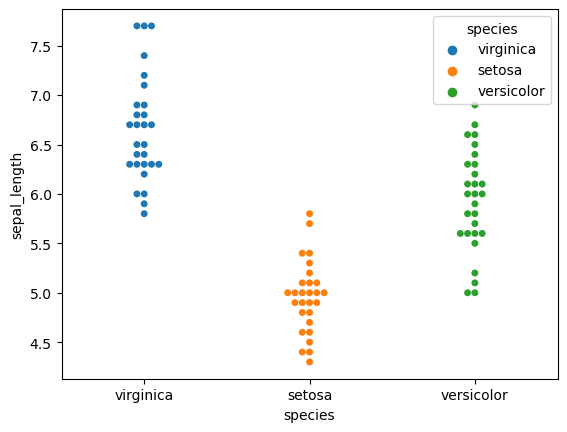

Comparision of sepal_width with species


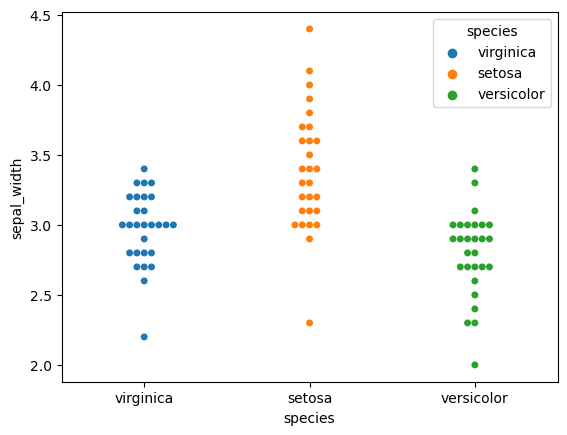

Comparision of petal_length with species


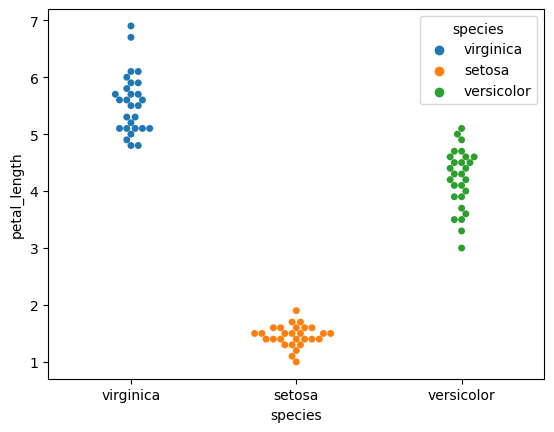

Comparision of petal_width with species


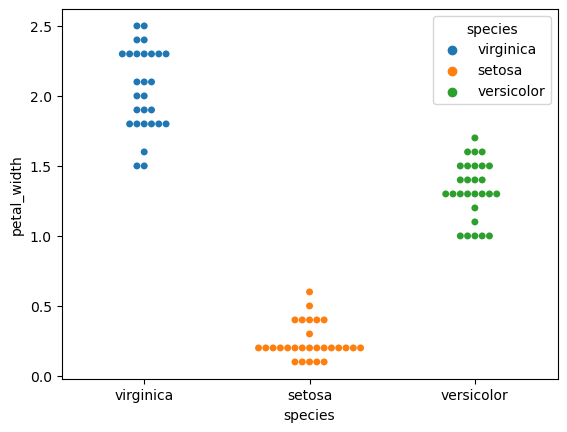

In [75]:
for col in num_cols:
    print (f'Comparision of {col} with species')
    sns.swarmplot(
        data=train,
        x=target,
        y=col,
        hue = target)
    plt.show()